In [1]:
pip install jupyterthemes


  Using cached jupyterthemes-0.20.0-py2.py3-none-any.whl (7.0 MB)


In [ ]:
pip uninstall jupyterthemes

In [2]:
!jt -l

Available Themes: 
   chesterish
   grade3
   gruvboxd
   gruvboxl
   monokai
   oceans16
   onedork
   solarizedd
   solarizedl


In [5]:
!jt -t chesterish

In [3]:
# to restore to jupyter notebook original theme
!jt -r

usage: jt [-h] [-l] [-t THEME] [-f MONOFONT] [-fs MONOSIZE] [-nf NBFONT]
          [-nfs NBFONTSIZE] [-tf TCFONT] [-tfs TCFONTSIZE] [-dfs DFFONTSIZE]
          [-ofs OUTFONTSIZE] [-mathfs MATHFONTSIZE] [-m MARGINS]
          [-cursw CURSORWIDTH] [-cursc CURSORCOLOR] [-cellw CELLWIDTH]
          [-lineh LINEHEIGHT] [-altp] [-altmd] [-altout] [-P] [-T] [-N] [-kl]
          [-vim] [-r] [-dfonts]
jt: error: unrecognized arguments: –r


In [49]:
# pandas and numpy imports
import pandas as pd
import numpy as np

# metrics imports
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import log_loss

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

# Preprocessing imports
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

# Pipeline Imports
from sklearn.pipeline import Pipeline

# Matplotlib import
import matplotlib.pyplot as plt

# directory setting
import os
os.chdir(r"C:\CDAC\6_Practical_Machine_Learning\Datasets")

In [48]:
# K-Nearest Neighbors algorithm Import
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor

# model_selection import
from sklearn.model_selection import train_test_split

In [14]:
import warnings
warnings.filterwarnings('ignore')

## Classification Problems

In [6]:
mowers = pd.read_csv("RidingMowers.csv")
mowers

,Income,Lot_Size,Response
0,34,26,Not Bought
1,34,40,Not Bought
2,34,46,Not Bought
3,34,48,Not Bought
4,34,53,Not Bought
...,...,...,...
175,86,121,Bought
176,87,109,Bought
177,88,119,Bought
178,89,110,Bought


In [7]:
mowers_dum = pd.get_dummies(mowers, drop_first=True)
mowers_dum

,Income,Lot_Size,Response_Not Bought
0,34,26,1
1,34,40,1
2,34,46,1
3,34,48,1
4,34,53,1
...,...,...,...
175,86,121,0
176,87,109,0
177,88,119,0
178,89,110,0


In [8]:
X = mowers_dum.drop('Response_Not Bought', axis = 1)
X

,Income,Lot_Size
0,34,26
1,34,40
2,34,46
3,34,48
4,34,53
...,...,...
175,86,121
176,87,109
177,88,119
178,89,110


In [9]:
y = mowers_dum['Response_Not Bought']
y

0      1
1      1
2      1
3      1
4      1
      ..
175    0
176    0
177    0
178    0
179    0
Name: Response_Not Bought, Length: 180, dtype: uint8

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, random_state = 2023, test_size = 0.3)

In [11]:
knn = KNeighborsClassifier(n_neighbors = 3)

In [12]:
std_scaler = StandardScaler()

In [14]:
X_train_scaled = std_scaler.fit_transform(X_train)
X_test_scaled = std_scaler.fit_transform(X_test)

In [15]:
knn.fit(X_train_scaled, y_train)
y_pred = knn.predict(X_test_scaled)

In [17]:
mowers_pred = pd.DataFrame()
mowers_pred['y_test']=y_test
mowers_pred['y_pred']=y_pred
mowers_pred

,y_test,y_pred
55,1,1
162,0,0
97,1,1
105,1,1
107,0,1
87,1,1
74,1,1
177,0,0
145,0,0
89,1,1


In [61]:
mowers_pred[(mowers_pred['y_test'] == mowers_pred['y_pred']) & (mowers_pred['y_test'] == 1)].count()

y_test    31
y_pred    31
dtype: int64

In [60]:
mowers_pred[(mowers_pred['y_test'] != mowers_pred['y_pred']) & (mowers_pred['y_test'] == 0)].count()

y_test    3
y_pred    3
dtype: int64

In [51]:
confusion_matrix(y_test,y_pred)

array([[19,  3],
       [ 1, 31]], dtype=int64)

In [39]:
accuracy_score(y_test, y_pred)

0.9259259259259259

In [41]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.86      0.95      0.90        20
           1       0.97      0.91      0.94        34

    accuracy                           0.93        54
   macro avg       0.92      0.93      0.92        54
weighted avg       0.93      0.93      0.93        54



In [43]:
print(classification_report(y_test, y_pred))
## As you can observe, precision and recall values will be swapped

              precision    recall  f1-score   support

           0       0.95      0.86      0.90        22
           1       0.91      0.97      0.94        32

    accuracy                           0.93        54
   macro avg       0.93      0.92      0.92        54
weighted avg       0.93      0.93      0.93        54



In [46]:
### Predicted Probabilities
y_pred_prob = knn.predict_proba(X_test_scaled)[:,1]

In [48]:
fpr, tpr, thres = roc_curve(y_test, y_pred_prob)

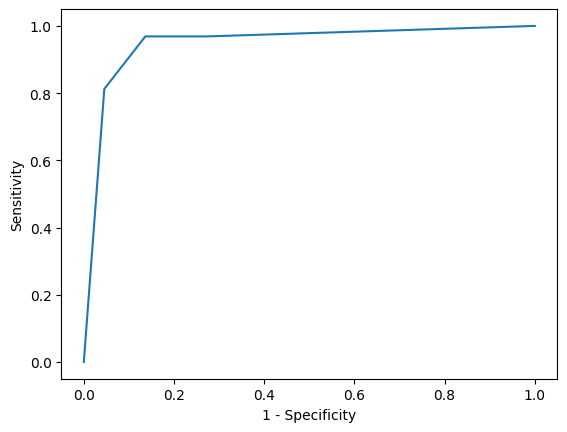

In [49]:
plt.plot(fpr, tpr)
plt.xlabel("1 - Specificity")
plt.ylabel("Sensitivity")
plt.show()

In [50]:
roc_auc_score(y_test, y_pred_prob)

0.9474431818181819

In [53]:
log_loss(y_test, y_pred_prob)

1.4357083744525154

Using Pipeline

In [4]:
from sklearn.pipeline import Pipeline

In [56]:
knn = KNeighborsClassifier(n_neighbors = 3)
std_scaler = StandardScaler()

In [57]:
pipe = Pipeline([('STD', std_scaler), ('KNN', knn)])

In [58]:
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)

In [59]:
confusion_matrix(y_test, y_pred)

array([[21,  1],
       [ 1, 31]], dtype=int64)

In [62]:
accuracy_score(y_test, y_pred)

0.9629629629629629

In [64]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95        22
           1       0.97      0.97      0.97        32

    accuracy                           0.96        54
   macro avg       0.96      0.96      0.96        54
weighted avg       0.96      0.96      0.96        54



In [65]:
## predicted probabilities
y_pred_prob = pipe.predict_proba(X_test)[:,1]

In [69]:
fpr, tpr, thres = roc_curve(y_test, y_pred_prob)
# fpr = 1 - specificity
# tpr = Sensitivity

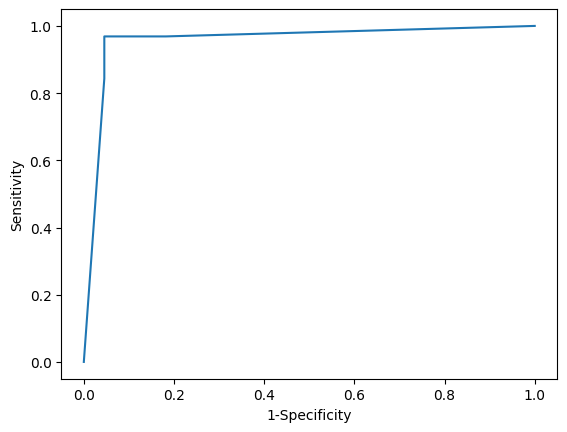

In [70]:
plt.plot(fpr, tpr)
plt.xlabel("1-Specificity")
plt.ylabel("Sensitivity")
plt.show()

Bankruptcy Dataset

In [19]:
os.chdir(r"C:\CDAC\6_Practical_Machine_learning\Cases\Bankruptcy")

In [20]:
brupt = pd.read_csv("Bankruptcy.csv")
brupt

,NO,D,YR,R1,R2,R3,R4,R5,R6,R7,...,R15,R16,R17,R18,R19,R20,R21,R22,R23,R24
0,1,0,78,0.23,0.08,0.02,0.03,0.46,0.12,0.19,...,0.05,0.57,0.15,0.23,3.56,0.26,1.55,0.43,0.11,0.17
1,2,0,77,0.19,0.07,0.09,0.12,0.02,0.02,0.03,...,0.09,0.12,0.16,0.22,3.78,1.29,1.40,0.06,0.07,0.10
2,3,0,72,0.07,0.02,0.03,0.05,0.06,0.10,0.14,...,-0.03,0.02,0.02,0.04,13.29,1.61,1.43,0.03,0.05,0.07
3,4,0,80,0.07,0.03,0.04,0.04,0.04,0.06,0.06,...,-0.02,0.01,0.02,0.02,5.36,1.30,1.12,-0.06,-0.08,-0.09
4,5,0,81,0.09,0.02,0.03,0.04,0.06,0.08,0.11,...,0.02,0.07,0.10,0.14,7.74,1.48,1.41,0.03,0.04,0.06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127,128,1,77,0.27,0.03,0.07,0.10,0.09,0.18,0.26,...,0.11,0.06,0.12,0.17,7.56,2.07,1.45,0.06,0.13,0.19
128,129,1,77,0.32,0.03,0.03,0.09,0.05,0.06,0.16,...,0.17,0.07,0.09,0.26,5.99,1.27,2.74,0.06,0.08,0.21
129,130,1,78,0.08,0.01,0.02,0.05,0.04,0.07,0.15,...,0.19,0.07,0.12,0.26,7.14,1.89,2.10,0.07,0.12,0.26
130,131,1,78,0.14,0.01,0.05,0.07,0.02,0.09,0.14,...,0.07,0.02,0.10,0.15,170.96,4.55,1.45,0.02,0.10,0.14


In [21]:
X = brupt.drop(['NO', 'D', 'YR'], axis=1)
X

,R1,R2,R3,R4,R5,R6,R7,R8,R9,R10,...,R15,R16,R17,R18,R19,R20,R21,R22,R23,R24
0,0.23,0.08,0.02,0.03,0.46,0.12,0.19,10.36,1.17,0.40,...,0.05,0.57,0.15,0.23,3.56,0.26,1.55,0.43,0.11,0.17
1,0.19,0.07,0.09,0.12,0.02,0.02,0.03,3.13,1.73,0.60,...,0.09,0.12,0.16,0.22,3.78,1.29,1.40,0.06,0.07,0.10
2,0.07,0.02,0.03,0.05,0.06,0.10,0.14,2.41,1.36,0.41,...,-0.03,0.02,0.02,0.04,13.29,1.61,1.43,0.03,0.05,0.07
3,0.07,0.03,0.04,0.04,0.04,0.06,0.06,5.55,1.13,0.44,...,-0.02,0.01,0.02,0.02,5.36,1.30,1.12,-0.06,-0.08,-0.09
4,0.09,0.02,0.03,0.04,0.06,0.08,0.11,2.85,1.88,0.42,...,0.02,0.07,0.10,0.14,7.74,1.48,1.41,0.03,0.04,0.06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127,0.27,0.03,0.07,0.10,0.09,0.18,0.26,7.58,2.24,0.28,...,0.11,0.06,0.12,0.17,7.56,2.07,1.45,0.06,0.13,0.19
128,0.32,0.03,0.03,0.09,0.05,0.06,0.16,3.24,5.44,0.46,...,0.17,0.07,0.09,0.26,5.99,1.27,2.74,0.06,0.08,0.21
129,0.08,0.01,0.02,0.05,0.04,0.07,0.15,3.82,2.41,0.37,...,0.19,0.07,0.12,0.26,7.14,1.89,2.10,0.07,0.12,0.26
130,0.14,0.01,0.05,0.07,0.02,0.09,0.14,8.18,1.57,0.11,...,0.07,0.02,0.10,0.15,170.96,4.55,1.45,0.02,0.10,0.14


In [22]:
y = brupt['D']
y

0      0
1      0
2      0
3      0
4      0
      ..
127    1
128    1
129    1
130    1
131    1
Name: D, Length: 132, dtype: int64

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=2023, test_size=0.3)

In [25]:
scores = []
for i in np.arange(1, 17, 2):
    knn = KNeighborsClassifier(n_neighbors=i)
    std_scaler = StandardScaler()
    pipe = Pipeline([('STD', std_scaler), ('KNN', knn)])
    pipe.fit(X_train, y_train)
    y_pred_prob = pipe.predict_proba(X_test)[:,1]
    
    auc = roc_auc_score(y_test, y_pred_prob)
    scores.append(auc)
    print("n_neighbors =", i, "AUC =", auc)

n_neighbors = 1 AUC = 0.85
n_neighbors = 3 AUC = 0.89
n_neighbors = 5 AUC = 0.9175
n_neighbors = 7 AUC = 0.9224999999999999
n_neighbors = 9 AUC = 0.945
n_neighbors = 11 AUC = 0.9425
n_neighbors = 13 AUC = 0.93625
n_neighbors = 15 AUC = 0.9275


In [26]:
print("Best Score =", np.max(scores))

Best Score = 0.945


In [27]:
i_max = np.argmax(scores)
best_k = np.arange(1, 17, 2)[i_max]

In [28]:
print("Best Parameter =", best_k)

Best Parameter = 9


Image Segmentation Dataset

In [30]:
os.chdir(r"C:\CDAC\6_Practical_Machine_Learning\Cases\Image Segmentation")

In [32]:
image_seg = pd.read_csv("Image_Segmention.csv")
image_seg

,Class,region.centroid.col,region.centroid.row,region.pixel.count,short.line.density.5,short.line.density.2,vedge.mean,vegde.sd,hedge.mean,hedge.sd,intensity.mean,rawred.mean,rawblue.mean,rawgreen.mean,exred.mean,exblue.mean,exgreen.mean,value.mean,saturation.mean,hue-mean
0,BRICKFACE,188,133,9,0.000000,0.0,0.333333,0.266667,0.500000,0.077778,6.666666,8.333334,7.777778,3.888889,5.000000,3.333333,-8.333333,8.444445,0.538580,-0.924817
1,BRICKFACE,105,139,9,0.000000,0.0,0.277778,0.107407,0.833333,0.522222,6.111111,7.555555,7.222222,3.555556,4.333334,3.333333,-7.666666,7.555555,0.532628,-0.965946
2,BRICKFACE,34,137,9,0.000000,0.0,0.500000,0.166667,1.111111,0.474074,5.851852,7.777778,6.444445,3.333333,5.777778,1.777778,-7.555555,7.777778,0.573633,-0.744272
3,BRICKFACE,39,111,9,0.000000,0.0,0.722222,0.374074,0.888889,0.429629,6.037037,7.000000,7.666666,3.444444,2.888889,4.888889,-7.777778,7.888889,0.562919,-1.175773
4,BRICKFACE,16,128,9,0.000000,0.0,0.500000,0.077778,0.666667,0.311111,5.555555,6.888889,6.666666,3.111111,4.000000,3.333333,-7.333334,7.111111,0.561508,-0.985811
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
204,GRASS,36,243,9,0.111111,0.0,1.888889,1.851851,2.000000,0.711110,13.333333,9.888889,12.111111,18.000000,-10.333333,-3.666667,14.000000,18.000000,0.452229,2.368311
205,GRASS,186,218,9,0.000000,0.0,1.166667,0.744444,1.166667,0.655555,13.703704,10.666667,12.666667,17.777779,-9.111111,-3.111111,12.222222,17.777779,0.401347,2.382684
206,GRASS,197,236,9,0.000000,0.0,2.444444,6.829628,3.333333,7.599998,16.074074,13.111111,16.666668,18.444445,-8.888889,1.777778,7.111111,18.555555,0.292729,2.789800
207,GRASS,208,240,9,0.111111,0.0,1.055556,0.862963,2.444444,5.007407,14.148149,10.888889,13.000000,18.555555,-9.777778,-3.444444,13.222222,18.555555,0.421621,2.392487


In [33]:
X = image_seg.drop('Class', axis=1)
X

,region.centroid.col,region.centroid.row,region.pixel.count,short.line.density.5,short.line.density.2,vedge.mean,vegde.sd,hedge.mean,hedge.sd,intensity.mean,rawred.mean,rawblue.mean,rawgreen.mean,exred.mean,exblue.mean,exgreen.mean,value.mean,saturation.mean,hue-mean
0,188,133,9,0.000000,0.0,0.333333,0.266667,0.500000,0.077778,6.666666,8.333334,7.777778,3.888889,5.000000,3.333333,-8.333333,8.444445,0.538580,-0.924817
1,105,139,9,0.000000,0.0,0.277778,0.107407,0.833333,0.522222,6.111111,7.555555,7.222222,3.555556,4.333334,3.333333,-7.666666,7.555555,0.532628,-0.965946
2,34,137,9,0.000000,0.0,0.500000,0.166667,1.111111,0.474074,5.851852,7.777778,6.444445,3.333333,5.777778,1.777778,-7.555555,7.777778,0.573633,-0.744272
3,39,111,9,0.000000,0.0,0.722222,0.374074,0.888889,0.429629,6.037037,7.000000,7.666666,3.444444,2.888889,4.888889,-7.777778,7.888889,0.562919,-1.175773
4,16,128,9,0.000000,0.0,0.500000,0.077778,0.666667,0.311111,5.555555,6.888889,6.666666,3.111111,4.000000,3.333333,-7.333334,7.111111,0.561508,-0.985811
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
204,36,243,9,0.111111,0.0,1.888889,1.851851,2.000000,0.711110,13.333333,9.888889,12.111111,18.000000,-10.333333,-3.666667,14.000000,18.000000,0.452229,2.368311
205,186,218,9,0.000000,0.0,1.166667,0.744444,1.166667,0.655555,13.703704,10.666667,12.666667,17.777779,-9.111111,-3.111111,12.222222,17.777779,0.401347,2.382684
206,197,236,9,0.000000,0.0,2.444444,6.829628,3.333333,7.599998,16.074074,13.111111,16.666668,18.444445,-8.888889,1.777778,7.111111,18.555555,0.292729,2.789800
207,208,240,9,0.111111,0.0,1.055556,0.862963,2.444444,5.007407,14.148149,10.888889,13.000000,18.555555,-9.777778,-3.444444,13.222222,18.555555,0.421621,2.392487


In [34]:
y = image_seg['Class']
y

0      BRICKFACE
1      BRICKFACE
2      BRICKFACE
3      BRICKFACE
4      BRICKFACE
         ...    
204        GRASS
205        GRASS
206        GRASS
207        GRASS
208        GRASS
Name: Class, Length: 209, dtype: object

In [35]:
## Using LabelEncoding
le = LabelEncoder()
le_y = le.fit_transform(y)

In [36]:
le_y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3])

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, le_y, stratify=le_y,random_state=2023,test_size=0.3)

In [43]:
ks = np.arange(1, 32, 2)
ll_scores = []

In [44]:
for i in ks:
    knn = KNeighborsClassifier(n_neighbors=i)
    std_scaler = StandardScaler()
    pipe = Pipeline([('STD', std_scaler), ('KNN', knn)])
    pipe.fit(X_train, y_train)
    y_pred_prob = pipe.predict_proba(X_test)
    
    ll = log_loss(y_test, y_pred_prob)
    ll_scores.append(ll)
    print("n_neighbors =", i, "Log Loss =", ll)

n_neighbors = 1 Log Loss = 7.4375792707702075
n_neighbors = 3 Log Loss = 3.6108509411539185
n_neighbors = 5 Log Loss = 2.546167684639261
n_neighbors = 7 Log Loss = 2.0640743874239447
n_neighbors = 9 Log Loss = 1.5360478481534563
n_neighbors = 11 Log Loss = 1.5362251537059641
n_neighbors = 13 Log Loss = 1.5721249945131621
n_neighbors = 15 Log Loss = 1.610372399127907
n_neighbors = 17 Log Loss = 1.1165421643098403
n_neighbors = 19 Log Loss = 1.159147887212799
n_neighbors = 21 Log Loss = 0.6809299646904134
n_neighbors = 23 Log Loss = 0.7135326991382255
n_neighbors = 25 Log Loss = 0.7465562207858895
n_neighbors = 27 Log Loss = 0.79046435372569
n_neighbors = 29 Log Loss = 0.8161569281929016
n_neighbors = 31 Log Loss = 0.8538794233262308


In [45]:
print("Best Log Loss Score = ", np.min(ll_scores))

Best Log Loss Score =  0.6809299646904134


In [47]:
i_min = np.argmin(ll_scores)
best_k = ks[i_min]
print("Best K parameter =", best_k)

Best K parameter = 21


## Regression Problems

In [51]:
os.chdir(r"C:\CDAC\6_Practical_Machine_Learning\Datasets")

Housing Dataset

In [52]:
housing = pd.read_csv("Housing.csv")
housing

,price,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea
0,42000.0,5850,3,1,2,yes,no,yes,no,no,1,no
1,38500.0,4000,2,1,1,yes,no,no,no,no,0,no
2,49500.0,3060,3,1,1,yes,no,no,no,no,0,no
3,60500.0,6650,3,1,2,yes,yes,no,no,no,0,no
4,61000.0,6360,2,1,1,yes,no,no,no,no,0,no
...,...,...,...,...,...,...,...,...,...,...,...,...
541,91500.0,4800,3,2,4,yes,yes,no,no,yes,0,no
542,94000.0,6000,3,2,4,yes,no,no,no,yes,0,no
543,103000.0,6000,3,2,4,yes,yes,no,no,yes,1,no
544,105000.0,6000,3,2,2,yes,yes,no,no,yes,1,no


In [53]:
housing_dum = pd.get_dummies(housing, drop_first=True)
housing_dum

,price,lotsize,bedrooms,bathrms,stories,garagepl,driveway_yes,recroom_yes,fullbase_yes,gashw_yes,airco_yes,prefarea_yes
0,42000.0,5850,3,1,2,1,1,0,1,0,0,0
1,38500.0,4000,2,1,1,0,1,0,0,0,0,0
2,49500.0,3060,3,1,1,0,1,0,0,0,0,0
3,60500.0,6650,3,1,2,0,1,1,0,0,0,0
4,61000.0,6360,2,1,1,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
541,91500.0,4800,3,2,4,0,1,1,0,0,1,0
542,94000.0,6000,3,2,4,0,1,0,0,0,1,0
543,103000.0,6000,3,2,4,1,1,1,0,0,1,0
544,105000.0,6000,3,2,2,1,1,1,0,0,1,0


In [54]:
X = housing_dum.drop('price', axis = 1)
X

,lotsize,bedrooms,bathrms,stories,garagepl,driveway_yes,recroom_yes,fullbase_yes,gashw_yes,airco_yes,prefarea_yes
0,5850,3,1,2,1,1,0,1,0,0,0
1,4000,2,1,1,0,1,0,0,0,0,0
2,3060,3,1,1,0,1,0,0,0,0,0
3,6650,3,1,2,0,1,1,0,0,0,0
4,6360,2,1,1,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
541,4800,3,2,4,0,1,1,0,0,1,0
542,6000,3,2,4,0,1,0,0,0,1,0
543,6000,3,2,4,1,1,1,0,0,1,0
544,6000,3,2,2,1,1,1,0,0,1,0


In [56]:
y = housing_dum['price']
y

0       42000.0
1       38500.0
2       49500.0
3       60500.0
4       61000.0
         ...   
541     91500.0
542     94000.0
543    103000.0
544    105000.0
545    105000.0
Name: price, Length: 546, dtype: float64

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2023, test_size=0.3)

In [58]:
ks = np.arange(1, 25)
scores = []

In [59]:
for i in ks:
    knn = KNeighborsRegressor(n_neighbors = i)
    std_scaler = StandardScaler()
    pipe = Pipeline([('STD', std_scaler), ('KNN', knn)])
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    scores.append(r2)
    print("n_neighbors =", i, "R2 =", r2)

n_neighbors = 1 R2 = 0.44797523896955826
n_neighbors = 2 R2 = 0.5610403297690534
n_neighbors = 3 R2 = 0.6690358559930478
n_neighbors = 4 R2 = 0.6449968610957627
n_neighbors = 5 R2 = 0.6417217047628296
n_neighbors = 6 R2 = 0.6435711589420596
n_neighbors = 7 R2 = 0.6396280404139868
n_neighbors = 8 R2 = 0.6417106834518391
n_neighbors = 9 R2 = 0.6395880087321557
n_neighbors = 10 R2 = 0.6413831136032477
n_neighbors = 11 R2 = 0.6324292194398411
n_neighbors = 12 R2 = 0.6289163226418462
n_neighbors = 13 R2 = 0.6238745255085058
n_neighbors = 14 R2 = 0.6206192899707459
n_neighbors = 15 R2 = 0.6189092636556895
n_neighbors = 16 R2 = 0.6141871335237205
n_neighbors = 17 R2 = 0.6087183871001497
n_neighbors = 18 R2 = 0.6028309033859123
n_neighbors = 19 R2 = 0.6027584925917402
n_neighbors = 20 R2 = 0.5993651265163474
n_neighbors = 21 R2 = 0.5916037029461295
n_neighbors = 22 R2 = 0.5811049345259469
n_neighbors = 23 R2 = 0.5801713955497791
n_neighbors = 24 R2 = 0.5763920449025719


In [60]:
print("Best R2 score =",np.max(scores))

Best R2 score = 0.6690358559930478


In [61]:
i_max = np.argmax(scores)
best_k = ks[i_max]
print("Best k parameter =", best_k)

Best k parameter = 3


Exp_Salaries dataset

In [63]:
exp_sals = pd.read_csv("Exp_Salaries.csv")
exp_sals.head()

,Salary,Years_Previous_Experience,Years_Employed,Years_Education,Gender,Department,Number_Supervised
0,32782,1,0,7,Male,A,0
1,32920,3,15,9,Female,A,4
2,29548,6,5,1,Male,A,0
3,39828,6,18,5,Female,A,5
4,31528,11,3,3,Male,A,6


In [65]:
dum_sals = pd.get_dummies(exp_sals, drop_first = True)
dum_sals.head()

,Salary,Years_Previous_Experience,Years_Employed,Years_Education,Number_Supervised,Gender_Male,Department_B,Department_C,Department_D
0,32782,1,0,7,0,1,0,0,0
1,32920,3,15,9,4,0,0,0,0
2,29548,6,5,1,0,1,0,0,0
3,39828,6,18,5,5,0,0,0,0
4,31528,11,3,3,6,1,0,0,0


In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2023, test_size=0.3)

In [67]:
ks = np.arange(1,11)
scores = []

In [68]:
for i in ks:
    knn = KNeighborsRegressor(n_neighbors=i)
    std_scaler = StandardScaler()
    pipe = Pipeline([('STD', std_scaler), ('KNN', knn)])
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    scores.append(r2)
    print("n_neighbors =", i, "R2 =", r2)

n_neighbors = 1 R2 = 0.44797523896955826
n_neighbors = 2 R2 = 0.5610403297690534
n_neighbors = 3 R2 = 0.6690358559930478
n_neighbors = 4 R2 = 0.6449968610957627
n_neighbors = 5 R2 = 0.6417217047628296
n_neighbors = 6 R2 = 0.6435711589420596
n_neighbors = 7 R2 = 0.6396280404139868
n_neighbors = 8 R2 = 0.6417106834518391
n_neighbors = 9 R2 = 0.6395880087321557
n_neighbors = 10 R2 = 0.6413831136032477


In [70]:
print("Best r2 Score =", np.max(scores))

Best r2 Score = 0.6690358559930478


In [72]:
i_max = np.argmax(scores)
best_k = ks[i_max]
print("Best k parameter =", best_k)

Best k parameter = 3


In [8]:
x = 2
x**2

4